## Load Data and libraries

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/home/amy/work/RIT/TDess/DSCI-601-Amy/Data/Combined/combined_AAPL.csv')

## Regression Coefficients 

In [3]:
data = data.dropna(subset=['RET', 'VOL_CHANGE', 'BA_SPREAD', 'ILLIQUIDITY'])


##### Defining Independent and Dependent Variables

In [4]:
X = data[['VOL_CHANGE', 'BA_SPREAD', 'ILLIQUIDITY']]  # Predictor variables
y = data['RET']  # Response variable

# Add a constant to the model (the intercept)
X = sm.add_constant(X)


In [5]:
model = sm.OLS(y, X).fit()


In [6]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     966.8
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:41:13   Log-Likelihood:                 18276.
No. Observations:                7809   AIC:                        -3.654e+04
Df Residuals:                    7805   BIC:                        -3.652e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0015      0.000      4.931      

#### Leverage and Cook plots
Diagnostic tools used in regression analysis to identify influential observations that might unduly affect the model fit.
##### Leverage 
- Measures the influence an observation has over its fitted value, essentially indicating the impact of a data point on its own prediction. Leverage is a function of how much the independent variable values of an observation differ from the mean of those independent variables. Points with high leverage have extreme predictor values.

##### Cook
- Measures the influence of each observation on the fitted values across the entire model. It is an aggregate measure that combines the information about the leverage of each observation with the size of its residual.

##### Leverage, also known as hat values, helps identify points that have more influence on the parameter estimates due to their position in the X space.

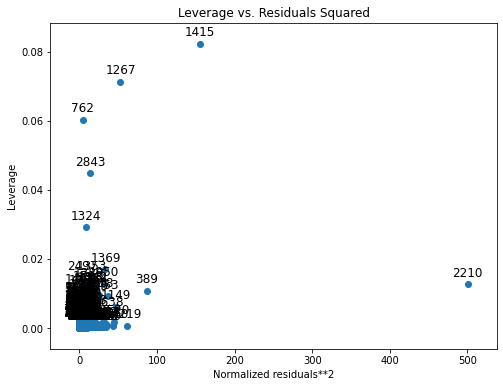

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_leverage_resid2(model, ax=ax)
plt.title('Leverage vs. Residuals Squared')
plt.show()

-  Points with high leverage and high residuals. These points that not only have unusual predictor values but also deviate significantly from the model prediction.

##### Cook’s distance measures the effect of deleting a given observation. Points with a large Cook's distance are considered influential.

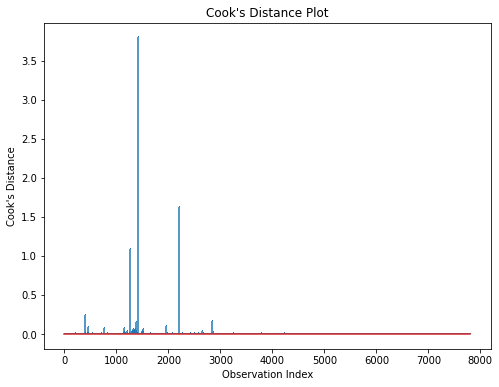

In [11]:
influence = model.get_influence()
(c, p) = influence.cooks_distance

fig, ax = plt.subplots(figsize=(8, 6))
ax.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()


- Points with a Cook's distance higher than approximately 4 times the mean of Cook's distances or any heuristic thresholds like 
D > 0.5. These points potentially have a substantial impact on the coefficients of the model.

##### Removing the points

In [12]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Set a threshold for Cook's distance, e.g., greater than 0.5
high_cooks_d = np.where(cooks_d > 0.5)[0]


In [13]:
# Drop the observations with high Cook's distance
data_cleaned = data.drop(index=high_cooks_d)


In [14]:

X_cleaned = data_cleaned[['VOL_CHANGE', 'BA_SPREAD', 'ILLIQUIDITY']]
y_cleaned = data_cleaned['RET']

# Add a constant to the model (the intercept)
X_cleaned = sm.add_constant(X_cleaned)

# Fit the model
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()


In [15]:
print(model_cleaned.summary())


                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     1045.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:08:01   Log-Likelihood:                 18639.
No. Observations:                7806   AIC:                        -3.727e+04
Df Residuals:                    7802   BIC:                        -3.724e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0015      0.000      5.043      

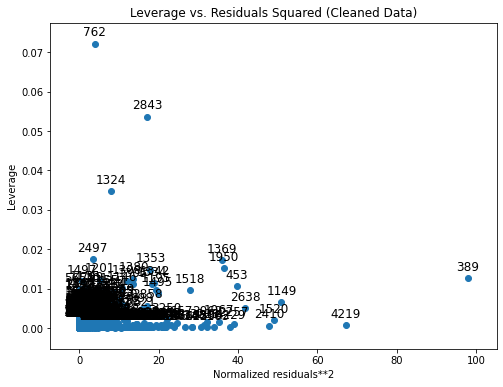

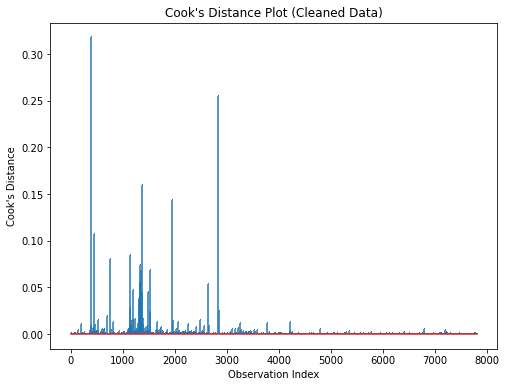

In [16]:
# Check for leverage and Cook's distance again with the new model
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_leverage_resid2(model_cleaned, ax=ax)
plt.title('Leverage vs. Residuals Squared (Cleaned Data)')
plt.show()

# Cook's distance plot for the new model
influence_cleaned = model_cleaned.get_influence()
(c_cleaned, p_cleaned) = influence_cleaned.cooks_distance

fig, ax = plt.subplots(figsize=(8, 6))
ax.stem(np.arange(len(c_cleaned)), c_cleaned, markerfmt=",")
plt.title("Cook's Distance Plot (Cleaned Data)")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()


In [17]:
data_cleaned

,date,RET,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,DJI_Return
0,1/2/1992,0.055432,0.717745,0.008403,4.510000e-10,0.000408,17.419850,0.000000
1,1/3/1992,-0.008403,-0.172890,0.004237,-8.340000e-11,0.004985,14.408127,0.009173
2,1/6/1992,-0.016949,-0.399632,0.004310,-2.850000e-10,-0.003291,8.650181,-0.000437
3,1/7/1992,0.019397,0.237283,0.004228,2.590000e-10,-0.001340,10.702726,0.001469
4,1/8/1992,0.023256,0.645321,0.004132,1.840000e-10,0.001677,17.609419,-0.000281
...,...,...,...,...,...,...,...,...
7804,12/23/2022,-0.002798,-0.181476,0.000076,-3.330000e-13,0.005868,4.008909,0.005342
7805,12/27/2022,-0.013878,0.081093,0.000231,-1.550000e-12,-0.004050,4.334004,0.001133
7806,12/28/2022,-0.030685,0.238299,0.000079,-2.850000e-12,-0.012021,5.366792,-0.011006
7807,12/29/2022,0.028324,-0.115337,0.000231,2.890000e-12,0.017461,4.747802,0.010497


In [19]:
data_cleaned.to_csv('Cleaned_AAPL.csv', encoding='utf-8', index=False)

## Cumulative Returns

In [20]:
# Using cleaned data here
data_CR = pd.read_csv('/home/amy/work/RIT/TDess/DSCI-601-Amy/ProjectCode/Data Pipelines/Cleaned_AAPL.csv', parse_dates=True, index_col='date')

In [24]:
# Calculating Cumulative Returns by incrementing the returns by 1, computing the cumulative product, and then subtracting 1. 
# This gives the total percentage gain or loss over the period.
data_CR['Cumulative Returns'] = (1 + data_CR['RET']).cumprod() - 1


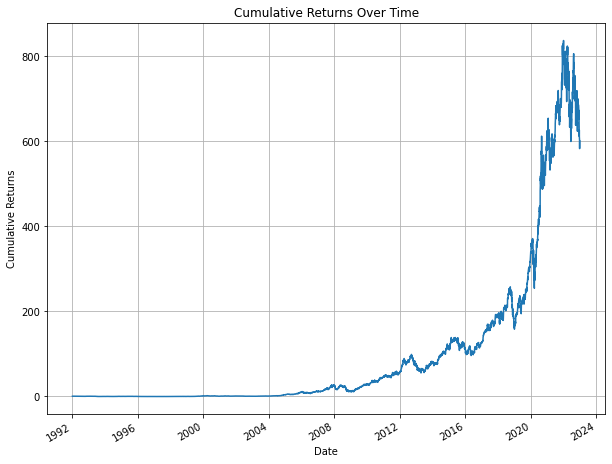

In [28]:
# Plotting Cumulative Returns
'''
(1 + data['RET']): Incrementing each return by one prepares them to be multiplied cumulatively. 
For instance, if the return is 0.01 (1%), this becomes 1.01.

.cumprod(): This function cumulatively multiplies the returns, effectively compounding them over time.

- 1: After calculating the cumulative product, subtract one to shift the scale back to represent total gains or losses as a decimal.
'''

fig, ax = plt.subplots(figsize=(10, 8))
data_CR['Cumulative Returns'].plot()
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


## Relative Strength Index

- Momentum oscillator used in technical analysis that measures the speed and magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 

- Overbought and Oversold: RSI values *over 70 are generally considered overbought*, suggesting that a security may be becoming overvalued and could experience a trend reversal or corrective pullback in price. 

- Conversely, an RSI reading *under 30 is considered oversold*, indicating potential undervaluation and a possible upward turn in price.


In [29]:
data_RSI = pd.read_csv('/home/amy/work/RIT/TDess/DSCI-601-Amy/ProjectCode/Data Pipelines/Cleaned_AAPL.csv')

In [32]:
# Using returns to calculate RSI
def calculate_rsi(data, window_length=14):
    # Interpret RET as price change
    gains = data['RET'].where(data['RET'] > 0, 0)
    losses = -data['RET'].where(data['RET'] < 0, 0)

    # Calculate the Exponential Moving Average (EMA) of gains and losses
    avg_gain = gains.ewm(span=window_length, adjust=False).mean()
    avg_loss = losses.ewm(span=window_length, adjust=False).mean()

    # Calculate RS and RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi


In [33]:

data_RSI['RSI'] = calculate_rsi(data_RSI)


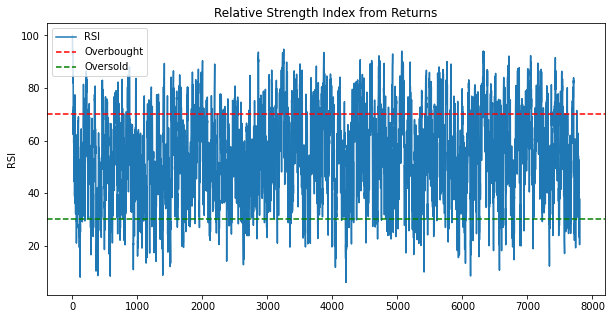

In [34]:
plt.figure(figsize=(10, 5))
data_RSI['RSI'].plot()
plt.title('Relative Strength Index from Returns')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.show()


## Sharpe Ratio